In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
pd.set_option('future.no_silent_downcasting', True)
sns.set(style='whitegrid', palette='muted')

In [3]:
train_df = pd.read_csv('train.csv')

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train_df.duplicated().sum()

np.int64(0)

### Visualize target balance

In [8]:
train_df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

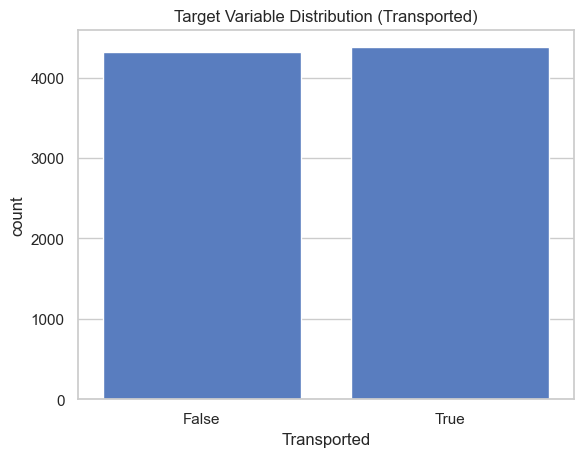

In [9]:
sns.countplot(x='Transported', data=train_df)
plt.title('Target Variable Distribution (Transported)')
plt.show()

In [10]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [11]:
print(train_df['HomePlanet'].value_counts())
print()
print(train_df['CryoSleep'].value_counts())
print()
print(train_df['Destination'].value_counts())
print()
print(train_df['VIP'].value_counts())

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

VIP
False    8291
True      199
Name: count, dtype: int64


In [12]:
print(train_df.groupby('HomePlanet')['Transported'].mean())
print()
print(train_df.groupby('CryoSleep')['Transported'].mean())
print()
print(train_df.groupby('Destination')['Transported'].mean())
print()
print(train_df.groupby('VIP')['Transported'].mean())

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64

Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64

VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64


### Data Cleaning

In [13]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [14]:
# Fill categorical columns with mode 
train_df['HomePlanet'] = train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0])
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0])
train_df['Destination'] = train_df['Destination'].fillna(train_df['Destination'].mode()[0])
train_df['VIP'] = train_df['VIP'].fillna(train_df['VIP'].mode()[0])

# Fill  numerical columns (median for age and zero for spending columns)
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
spending_cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
train_df[spending_cols] = train_df[spending_cols].fillna(0)

# Fill Unknown for Name and Cabin columns 
train_df['Cabin'] = train_df['Cabin'].fillna('Unknown')
train_df['Name'] = train_df['Name'].fillna('Unknown')

train_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

### Feature Engineering

In [15]:
# Split Cabin into Deck, CabinNum, Side
def split_cabin(cabin):
    try:
        if cabin == 'Unknown':
            return pd.Series(['Unknown', -1, 'Unknown'])
        deck, num, side = cabin.split('/')
        return pd.Series([deck, int(num), side])
    except:
        return pd.Series(['Unknown', -1, 'Unknown'])

# Apply function to create new columns
train_df[['Deck', 'CabinNum', 'Side']] = train_df['Cabin'].apply(split_cabin)

# Drop original Cabin column
train_df.drop('Cabin', axis=1, inplace=True)

In [16]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Deck', 'CabinNum', 'Side'],
      dtype='object')

In [17]:
# Extract Group size from PassengerId
# PassengerId like '0003_01' → group prefix '0003'
train_df['Group'] = train_df['PassengerId'].apply(lambda x: x.split('_')[0])

# Count passengers per group
group_sizes = train_df['Group'].value_counts().to_dict()
train_df['GroupSize'] = train_df['Group'].map(group_sizes)

In [18]:
# Convert categorical features to numeric

# Binary columns
train_df['CryoSleep'] = train_df['CryoSleep'].map({True:1, False:0})
train_df['VIP'] = train_df['VIP'].map({True:1, False:0})
train_df['Transported'] = train_df['Transported'].map({True:1, False:0})

# One-hot encode multi-class columns
train_df = pd.get_dummies(train_df, columns=['HomePlanet','Destination','Deck','Side'], drop_first=True)

# Understanding One-Hot Encoding in This Dataset

In this dataset, we applied **one-hot encoding** to categorical features (`HomePlanet`, `Destination`, `Deck`, and `Side`) with `drop_first=True`. This means the first category of each feature is dropped to avoid redundancy.

# HomePlanet
`HomePlanet` had three categories: Earth, Europa, and Mars. Only `HomePlanet_Europa` and `HomePlanet_Mars` were kept as columns, so a passenger from **Earth** is represented by zeros in both columns.

# Side
For `Side`, only `Side_S` and `Side_Unknown` exist, so passengers on the **P (Port) side** have zeros in both columns.

# Deck Unknown
Missing cabin values were filled as `'Unknown'`, which creates the columns `Deck_Unknown` and `Side_Unknown` to indicate unknown cabins.

# Destination
For `Destination`, `Destination_PSO J318.5-22` and `Destination_TRAPPIST-1e` are present, so passengers going to **55 Cancri e** have zeros in both columns.

# Key Point
Any category not explicitly listed as a dummy column is represented by zeros in all the other dummy columns of that feature. This approach keeps all information while reducing multicollinearity in the dataset.


##### value_counts() for Categorical/Binary Features

In [19]:
train_df.columns

Index(['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'CabinNum',
       'Group', 'GroupSize', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Deck_Unknown', 'Side_S', 'Side_Unknown'],
      dtype='object')

In [20]:
print("CryoSleep:\n", train_df['CryoSleep'].value_counts(), "\n")
print("VIP:\n", train_df['VIP'].value_counts(), "\n")
print("Deck_Unknown:\n", train_df['Deck_Unknown'].value_counts(), "\n")
print("Side_Unknown:\n", train_df['Side_Unknown'].value_counts(), "\n")
print("HomePlanet_Europa:\n", train_df['HomePlanet_Europa'].value_counts(), "\n")

CryoSleep:
 CryoSleep
0    5656
1    3037
Name: count, dtype: int64 

VIP:
 VIP
0    8494
1     199
Name: count, dtype: int64 

Deck_Unknown:
 Deck_Unknown
False    8494
True      199
Name: count, dtype: int64 

Side_Unknown:
 Side_Unknown
False    8494
True      199
Name: count, dtype: int64 

HomePlanet_Europa:
 HomePlanet_Europa
False    6562
True     2131
Name: count, dtype: int64 



In [21]:
print("HomePlanet_Mars:\n", train_df['HomePlanet_Mars'].value_counts(), "\n")
print("Destination_TRAPPIST-1e:\n", train_df['Destination_TRAPPIST-1e'].value_counts(), "\n")

HomePlanet_Mars:
 HomePlanet_Mars
False    6934
True     1759
Name: count, dtype: int64 

Destination_TRAPPIST-1e:
 Destination_TRAPPIST-1e
True     6097
False    2596
Name: count, dtype: int64 



##### groupby() with Target Mean (Feature vs Target)

In [22]:
print("CryoSleep vs Transported:")
print(train_df.groupby('CryoSleep')['Transported'].mean(), "\n")
print("VIP vs Transported:")
print(train_df.groupby('VIP')['Transported'].mean(), "\n")
print("Deck_Unknown vs Transported:")
print(train_df.groupby('Deck_Unknown')['Transported'].mean(), "\n")
print("Side_Unknown vs Transported:")
print(train_df.groupby('Side_Unknown')['Transported'].mean(), "\n")
print("GroupSize vs Transported:")
print(train_df.groupby('GroupSize')['Transported'].mean().sort_index(), "\n")

CryoSleep vs Transported:
CryoSleep
0    0.335042
1    0.817583
Name: Transported, dtype: float64 

VIP vs Transported:
VIP
0    0.506475
1    0.381910
Name: Transported, dtype: float64 

Deck_Unknown vs Transported:
Deck_Unknown
False    0.503650
True     0.502513
Name: Transported, dtype: float64 

Side_Unknown vs Transported:
Side_Unknown
False    0.503650
True     0.502513
Name: Transported, dtype: float64 

GroupSize vs Transported:
GroupSize
1    0.452445
2    0.538050
3    0.593137
4    0.640777
5    0.592453
6    0.614943
7    0.541126
8    0.394231
Name: Transported, dtype: float64 



In [23]:
# Loop through all dummy variables
dummy_cols = [col for col in train_df.columns if '_' in col and col not in ['Transported', 'PassengerId', 'Name', 'Group']]

for col in dummy_cols:
    print(f"{col} vs Transported:")
    print(train_df.groupby(col)['Transported'].mean())
    print()

HomePlanet_Europa vs Transported:
HomePlanet_Europa
False    0.453215
True     0.658846
Name: Transported, dtype: float64

HomePlanet_Mars vs Transported:
HomePlanet_Mars
False    0.498702
True     0.523024
Name: Transported, dtype: float64

Destination_PSO J318.5-22 vs Transported:
Destination_PSO J318.5-22
False    0.503609
True     0.503769
Name: Transported, dtype: float64

Destination_TRAPPIST-1e vs Transported:
Destination_TRAPPIST-1e
False    0.577427
True     0.472199
Name: Transported, dtype: float64

Deck_B vs Transported:
Deck_B
False    0.480920
True     0.734275
Name: Transported, dtype: float64

Deck_C vs Transported:
Deck_C
False    0.487038
True     0.680054
Name: Transported, dtype: float64

Deck_D vs Transported:
Deck_D
False    0.507730
True     0.433054
Name: Transported, dtype: float64

Deck_E vs Transported:
Deck_E
False    0.520020
True     0.357306
Name: Transported, dtype: float64

Deck_F vs Transported:
Deck_F
False    0.533819
True     0.439871
Name: Transpor

##### Visualizations 

<Axes: xlabel='Age', ylabel='Count'>

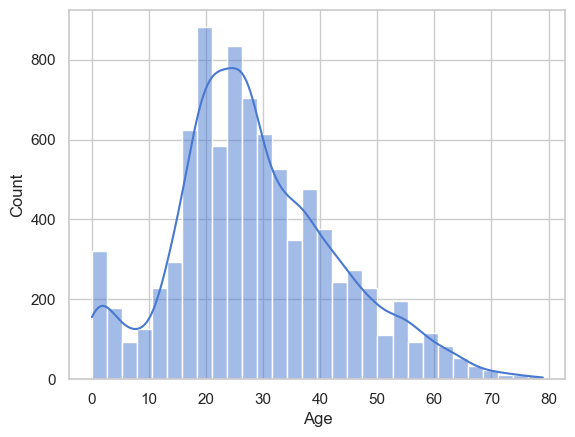

In [24]:
sns.histplot(train_df['Age'], bins=30, kde=True)

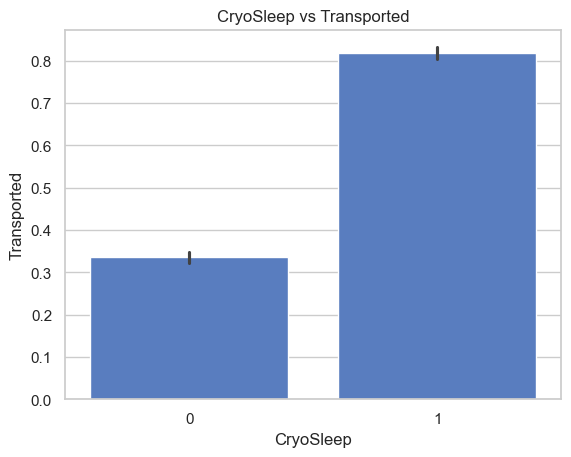

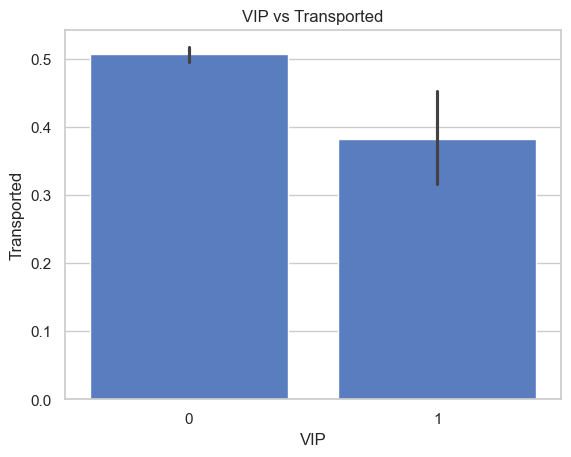

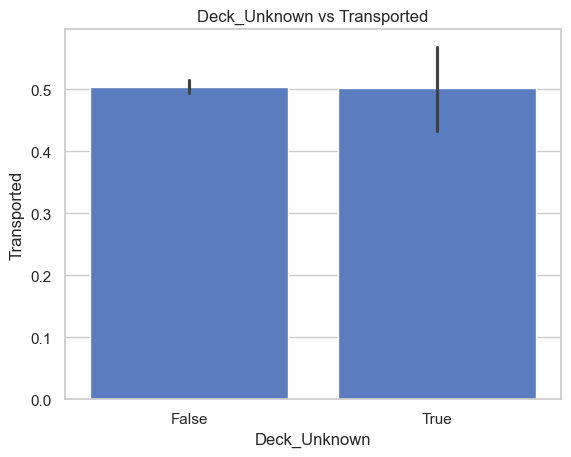

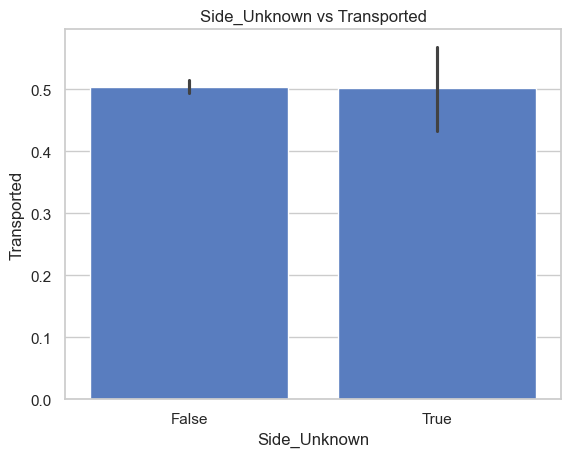

In [25]:
binary_cols = ['CryoSleep', 'VIP', 'Deck_Unknown', 'Side_Unknown']
for col in binary_cols:
    sns.barplot(x=col, y='Transported', data=train_df)
    plt.title(f'{col} vs Transported')
    plt.show()

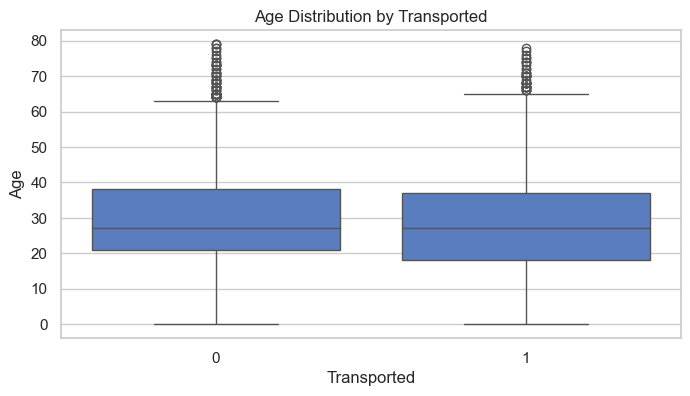

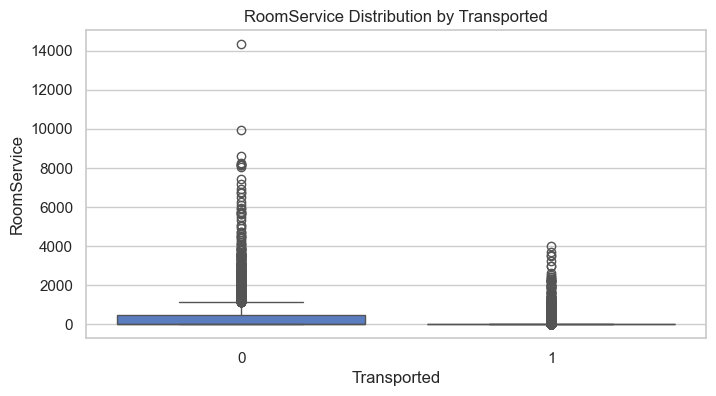

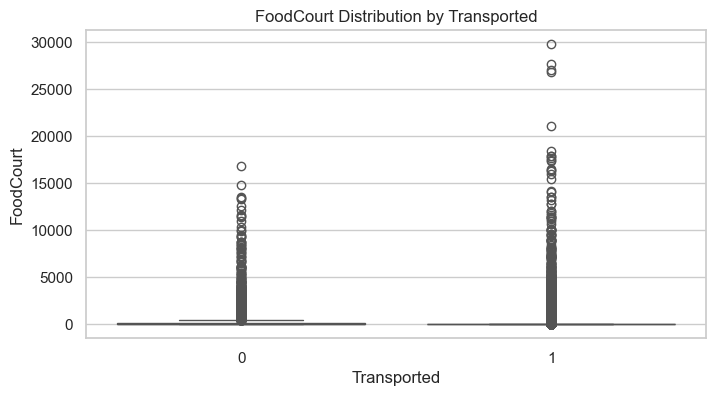

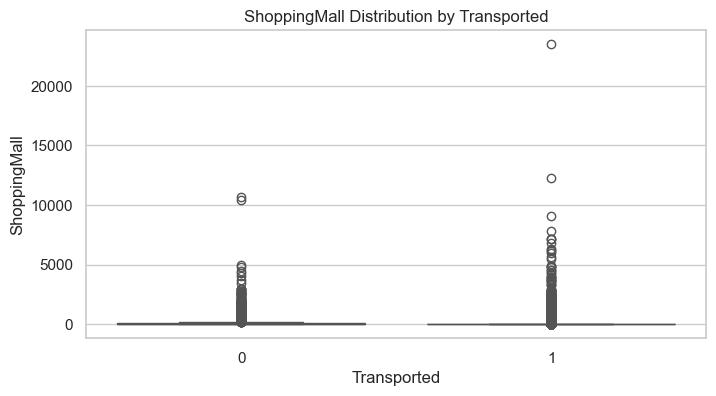

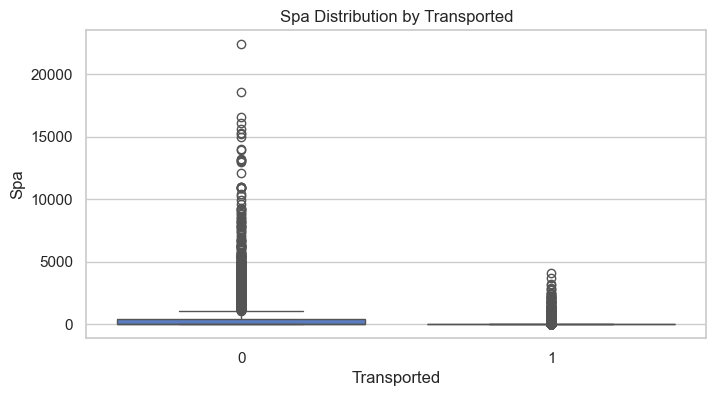

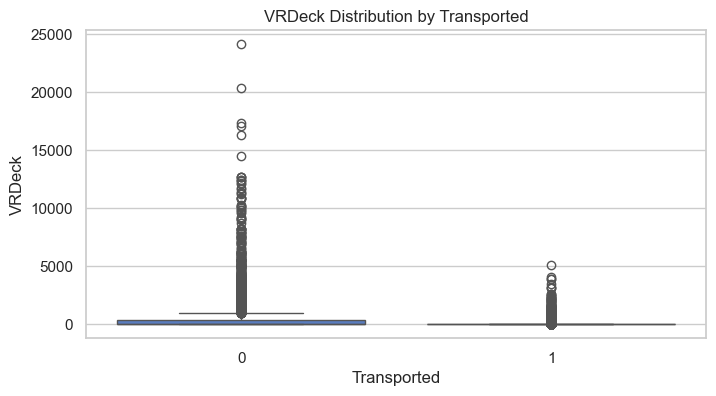

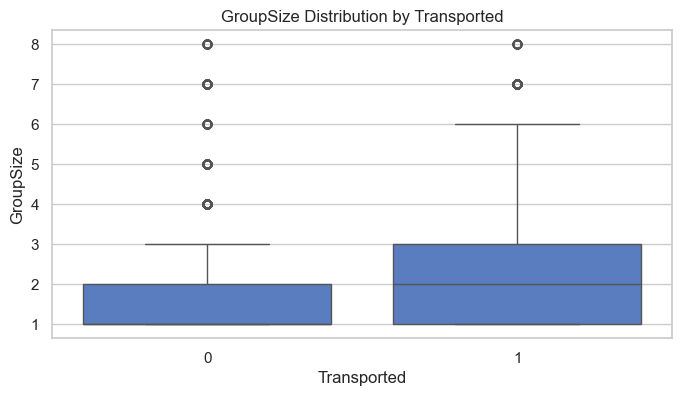

In [26]:
num_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','GroupSize']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Transported', y=col, data=train_df)
    plt.title(f'{col} Distribution by Transported')
    plt.show()

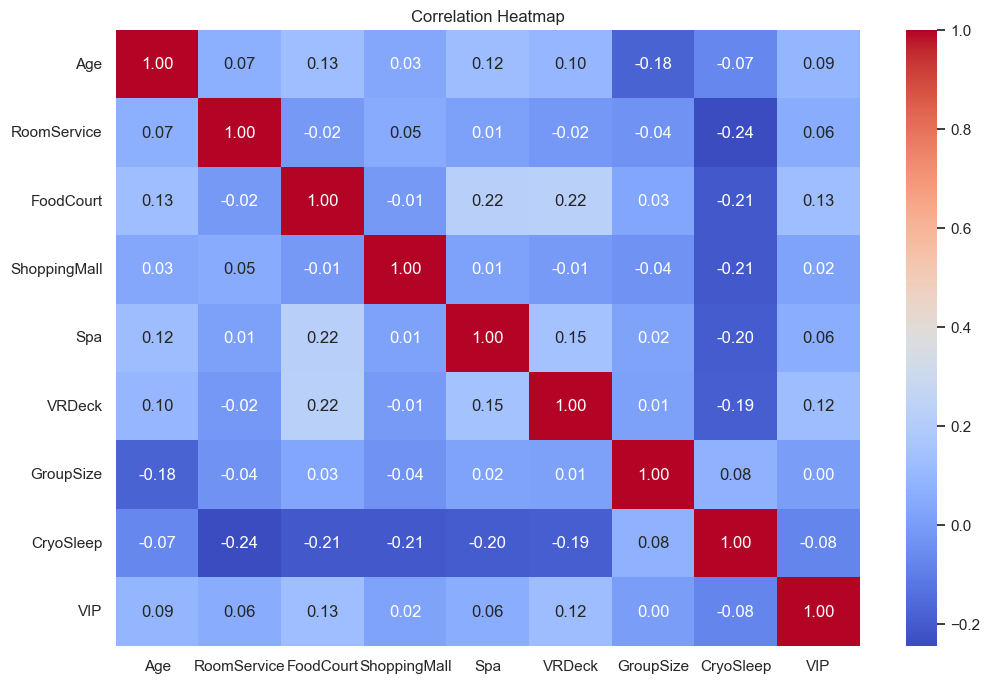

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df[num_cols + ['CryoSleep','VIP']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
from scipy import stats
from statsmodels.stats.multitest import multipletests
import math

##### Specify feature lists and helper functions

In [29]:
numeric_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','GroupSize','CabinNum']

binary_cols = [c for c in ['CryoSleep','VIP','Deck_Unknown','Side_Unknown'] if c in train_df.columns] \
              + [c for c in train_df.columns if '_' in c and c not in ['Transported','PassengerId','Name','Group']]

# remove any accidental numeric_cols that were one-hot encoded
numeric_cols = [c for c in numeric_cols if c in train_df.columns]

print("Numeric cols:", numeric_cols)
print("Candidate dummy/binary cols (sample):", binary_cols[:10])

# helper: Cohen's d for two independent groups (Welch-style pooled sd)
def cohens_d(x1, x2):
    n1, n2 = len(x1), len(x2)
    m1, m2 = np.nanmean(x1), np.nanmean(x2)
    s1, s2 = np.nanvar(x1, ddof=1), np.nanvar(x2, ddof=1)
    # pooled sd (Hedges correction not applied here)
    pooled_sd = math.sqrt(((n1-1)*s1 + (n2-1)*s2) / (n1 + n2 - 2)) if (n1 + n2 - 2) > 0 else np.nan
    return (m1 - m2) / pooled_sd if pooled_sd and pooled_sd>0 else np.nan

# helper: Cramer's V for contingency tables
def cramers_v(table):
    chi2 = stats.chi2_contingency(table)[0]
    n = table.sum().sum()
    k = min(table.shape)-1
    return math.sqrt(chi2 / (n * k)) if n>0 and k>0 else np.nan

Numeric cols: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'GroupSize', 'CabinNum']
Candidate dummy/binary cols (sample): ['CryoSleep', 'VIP', 'Deck_Unknown', 'Side_Unknown', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_B', 'Deck_C']


##### Numeric features: t-test (Welch), Mann-Whitney, point-biserial, Cohen's d

In [30]:
num_results = []

for col in numeric_cols:
    a = train_df[train_df['Transported']==1][col].dropna()
    b = train_df[train_df['Transported']==0][col].dropna()
    # Welch's t-test
    tstat, p_t = stats.ttest_ind(a, b, equal_var=False, nan_policy='omit')
    # Mann-Whitney U (non-parametric)
    try:
        ustat, p_mw = stats.mannwhitneyu(a, b, alternative='two-sided')
    except Exception as e:
        p_mw = np.nan
    # point-biserial correlation
    try:
        r, p_pb = stats.pointbiserialr(train_df['Transported'], train_df[col])
    except Exception:
        r, p_pb = np.nan, np.nan
    d = cohens_d(a, b)
    num_results.append({
        'feature': col,
        'test': 'welch_t',
        't_stat': tstat, 'p_value': p_t,
        'mannwhitney_p': p_mw,
        'pointbiserial_r': r, 'pointbiserial_p': p_pb,
        'cohens_d': d
    })

num_results_df = pd.DataFrame(num_results).sort_values('p_value')
num_results_df

,feature,test,t_stat,p_value,mannwhitney_p,pointbiserial_r,pointbiserial_p,cohens_d
1,RoomService,welch_t,-23.024933,9.842247e-112,2.695180e-252,-0.241124,3.205394e-115,-0.496865
4,Spa,welch_t,-20.736222,2.389959e-91,2.497450e-255,-0.218545,1.701990e-94,-0.447877
5,VRDeck,welch_t,-19.381869,1.627790e-80,1.304913e-229,-0.204874,4.969701e-83,-0.418590
6,GroupSize,welch_t,7.732832,1.169205e-14,9.515364e-27,0.082644,1.186047e-14,0.165841
0,Age,welch_t,-6.944552,4.071540e-12,9.574725e-11,-0.074233,4.216286e-12,-0.148863
2,FoodCourt,welch_t,4.267593,2.000761e-05,1.230152e-67,0.045583,2.122241e-05,0.091254
7,CabinNum,welch_t,-4.088361,4.383650e-05,4.182991e-05,-0.043830,4.352267e-05,-0.087737
3,ShoppingMall,welch_t,0.878233,3.798459e-01,2.002614e-99,0.009391,3.813140e-01,0.018781


##### Categorical / dummy features: chi-square & Cramer's V

In [31]:
cat_results = []

# choose dummy-like columns: those with exactly 2 unique values {0,1} or boolean
dummy_cols = [c for c in train_df.columns if c not in ['Transported','PassengerId','Name','Group'] and
              ((train_df[c].dropna().unique().tolist() == [0,1]) or (train_df[c].dropna().unique().tolist()==[1,0]) 
               or train_df[c].nunique()==2 or '_' in c)]

# dedupe and keep those that are actually binary
dummy_cols = sorted(set([c for c in dummy_cols if train_df[c].nunique()<=3]))  # <=3 to allow weird cases

for col in dummy_cols:
    # build contingency table
    ct = pd.crosstab(train_df[col], train_df['Transported'])
    try:
        chi2_stat, p_chi, dof, ex = stats.chi2_contingency(ct)
        cramer = cramers_v(ct)
    except Exception as e:
        p_chi, cramer = np.nan, np.nan
    # proportion difference (for 0/1 columns)
    try:
        vals = train_df.groupby(col)['Transported'].mean()
        # if binary, compute absolute difference between levels
        if len(vals)==2:
            diff = abs(vals.iloc[0] - vals.iloc[1])
        else:
            diff = np.nan
    except:
        diff = np.nan
    cat_results.append({
        'feature': col,
        'chi2_p': p_chi,
        'cramers_v': cramer,
        'prop_diff': diff
    })

cat_results_df = pd.DataFrame(cat_results).sort_values('chi2_p')
cat_results_df.head(60)

,feature,chi2_p,cramers_v,prop_diff
0,CryoSleep,0.000000e+00,0.459891,0.482541
11,HomePlanet_Europa,6.017306e-61,0.176649,0.205630
1,Deck_B,2.807619e-41,0.144330,0.253355
2,Deck_C,9.256635e-24,0.107783,0.193016
13,Side_S,3.804713e-21,0.101225,0.101462
4,Deck_E,9.180471e-20,0.097583,0.162715
10,Destination_TRAPPIST-1e,3.337391e-19,0.096067,0.105227
5,Deck_F,3.383661e-16,0.087507,0.093948
15,VIP,6.681024e-04,0.036492,0.124566
3,Deck_D,1.764348e-03,0.033541,0.074675


##### Multiple testing correction and consolidated table

In [32]:
# combine numeric and categorical p-values into one table for BH correction
rows = []

# numeric: take t-test p-values
for _, r in num_results_df.iterrows():
    rows.append(('numeric', r['feature'], r['p_value']))

# categorical: chi2 p-values
for _, r in cat_results_df.iterrows():
    rows.append(('categorical', r['feature'], r['chi2_p']))

combined = pd.DataFrame(rows, columns=['type','feature','p'])
combined = combined.dropna(subset=['p']).reset_index(drop=True)

# Benjamini-Hochberg (FDR) correction
rej, pvals_corr, _, _ = multipletests(combined['p'].values, alpha=0.05, method='fdr_bh')
combined['p_fdr_bh'] = pvals_corr
combined['reject_null_fdr_0.05'] = rej

# merge back to get a single results table
num_df = num_results_df.set_index('feature')
cat_df = cat_results_df.set_index('feature')

rows_out = []
for _, row in combined.iterrows():
    feat = row['feature']
    entry = {'feature': feat, 'type': row['type'], 'p_raw': row['p'], 'p_fdr': row['p_fdr_bh'], 'significant': row['reject_null_fdr_0.05']}
    if feat in num_df.index:
        for c in ['t_stat','p_value','pointbiserial_r','pointbiserial_p','cohens_d','mannwhitney_p']:
            entry[c] = num_df.loc[feat, c]
    if feat in cat_df.index:
        for c in ['chi2_p','cramers_v','prop_diff']:
            entry[c] = cat_df.loc[feat, c]
    rows_out.append(entry)

results_df = pd.DataFrame(rows_out).sort_values('p_fdr').reset_index(drop=True)
results_df.head(50)

,feature,type,p_raw,p_fdr,significant,t_stat,p_value,pointbiserial_r,pointbiserial_p,cohens_d,mannwhitney_p,chi2_p,cramers_v,prop_diff
0,CryoSleep,categorical,0.000000e+00,0.000000e+00,True,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.459891,0.482541
1,RoomService,numeric,9.842247e-112,1.181070e-110,True,-23.024933,9.842247e-112,-0.241124,3.205394e-115,-0.496865,2.695180e-252,NaN,NaN,NaN
2,Spa,numeric,2.389959e-91,1.911967e-90,True,-20.736222,2.389959e-91,-0.218545,1.701990e-94,-0.447877,2.497450e-255,NaN,NaN,NaN
3,VRDeck,numeric,1.627790e-80,9.766742e-80,True,-19.381869,1.627790e-80,-0.204874,4.969701e-83,-0.418590,1.304913e-229,NaN,NaN,NaN
4,HomePlanet_Europa,categorical,6.017306e-61,2.888307e-60,True,NaN,NaN,NaN,NaN,NaN,NaN,6.017306e-61,0.176649,0.205630
5,Deck_B,categorical,2.807619e-41,1.123048e-40,True,NaN,NaN,NaN,NaN,NaN,NaN,2.807619e-41,0.144330,0.253355
6,Deck_C,categorical,9.256635e-24,3.173703e-23,True,NaN,NaN,NaN,NaN,NaN,NaN,9.256635e-24,0.107783,0.193016
7,Side_S,categorical,3.804713e-21,1.141414e-20,True,NaN,NaN,NaN,NaN,NaN,NaN,3.804713e-21,0.101225,0.101462
8,Deck_E,categorical,9.180471e-20,2.448126e-19,True,NaN,NaN,NaN,NaN,NaN,NaN,9.180471e-20,0.097583,0.162715
9,Destination_TRAPPIST-1e,categorical,3.337391e-19,8.009739e-19,True,NaN,NaN,NaN,NaN,NaN,NaN,3.337391e-19,0.096067,0.105227


In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [34]:
# 1) Create TotalSpending and a log-transformed version
spend_cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
train_df['TotalSpending'] = train_df[spend_cols].sum(axis=1)
train_df['Log_TotalSpending'] = np.log1p(train_df['TotalSpending'])

# 2) Winsorize or clip extreme spending values (example: clip to 99th percentile)
for c in spend_cols + ['TotalSpending','Log_TotalSpending','CabinNum','GroupSize']:
    if c in train_df.columns and train_df[c].dtype != 'object':
        upper = train_df[c].quantile(0.99)
        lower = train_df[c].quantile(0.01)
        train_df[c] = train_df[c].clip(lower, upper)

# 3) create interaction CryoSleep x Log_TotalSpending
if 'CryoSleep' in train_df.columns and 'Log_TotalSpending' in train_df.columns:
    train_df['Cryo_x_LogSpend'] = train_df['CryoSleep'] * train_df['Log_TotalSpending']

# 4) Choose candidate features (start with most promising ones)
candidate_feats = [
    # strong signals
    'CryoSleep', 'GroupSize', 'Age',
    # spending (log and total)
    'TotalSpending','Log_TotalSpending','Cryo_x_LogSpend',
    # cabin/deck and planet dummies (include existing dummy columns)
] + [c for c in train_df.columns if c.startswith('HomePlanet_') or c.startswith('Destination_') or c.startswith('Deck_') or c.startswith('Side_')]

# filter candidates to columns that exist and are numeric
candidate_feats = [c for c in candidate_feats if c in train_df.columns]
len(candidate_feats), candidate_feats[:20]

# 5) Quick train/test split for baseline evaluation
X = train_df[candidate_feats].copy()
y = train_df['Transported'].astype(int).copy()

# If any object columns left (shouldn't be), drop them
X = X.select_dtypes(include=[np.number])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 6) RandomForest baseline
rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_proba = rf.predict_proba(X_val)[:,1]
print("RF ROC AUC (val):", roc_auc_score(y_val, y_pred_proba))

# 7) Feature importances (RF)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top RF features:\n", importances.head(20))

# 8) Logistic baseline (scaled) for comparison
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
log = LogisticRegression(max_iter=2000, C=1.0, penalty='l2', solver='saga', random_state=42)
log.fit(X_train_s, y_train)
y_pred_proba_log = log.predict_proba(X_val_s)[:,1]
print("Logistic ROC AUC (val):", roc_auc_score(y_val, y_pred_proba_log))

# 9) Show logistic coefficients (by absolute size)
coefs = pd.Series(log.coef_[0], index=X.columns).sort_values(key=lambda s: s.abs(), ascending=False)
print("Top logistic coef magnitudes:\n", coefs.head(20))

RF ROC AUC (val): 0.7559372635544479
Top RF features:
 TotalSpending        0.308860
Log_TotalSpending    0.296039
CryoSleep            0.198574
Age                  0.134316
GroupSize            0.062212
Cryo_x_LogSpend      0.000000
dtype: float64
Logistic ROC AUC (val): 0.7503915406064647
Top logistic coef magnitudes:
 Log_TotalSpending   -0.710059
CryoSleep            0.520918
TotalSpending        0.152181
GroupSize            0.050702
Age                  0.024691
Cryo_x_LogSpend      0.000000
dtype: float64


In [35]:
# Check correlations and VIF (multicollinearity)
# Correlation between raw & log spending
print(train_df[['TotalSpending','Log_TotalSpending']].corr())

# Full correlation matrix (numeric)
num_cols = ['TotalSpending','Log_TotalSpending','CryoSleep','Age','GroupSize','CabinNum']
print(train_df[num_cols].corr())

# VIF to quantify multicollinearity (install statsmodels if needed)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = train_df[['TotalSpending','Log_TotalSpending','CryoSleep','Age','GroupSize']].dropna()
X_vif = (X_vif - X_vif.mean())/X_vif.std()  # scale for stability
vif = pd.DataFrame({
    'feature': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print(vif)

                   TotalSpending  Log_TotalSpending
TotalSpending           1.000000           0.616502
Log_TotalSpending       0.616502           1.000000
                   TotalSpending  Log_TotalSpending  CryoSleep       Age  \
TotalSpending           1.000000           0.616502  -0.415658  0.199886   
Log_TotalSpending       0.616502           1.000000  -0.845187  0.245130   
CryoSleep              -0.415658          -0.845187   1.000000 -0.071323   
Age                     0.199886           0.245130  -0.071323  1.000000   
GroupSize               0.010321          -0.160802   0.079363 -0.176957   
CabinNum               -0.221839          -0.017680  -0.039858 -0.127939   

                   GroupSize  CabinNum  
TotalSpending       0.010321 -0.221839  
Log_TotalSpending  -0.160802 -0.017680  
CryoSleep           0.079363 -0.039858  
Age                -0.176957 -0.127939  
GroupSize           1.000000 -0.051604  
CabinNum           -0.051604  1.000000  
             feature    

In [36]:
def cv_auc(features):
    X = train_df[features].select_dtypes(include=[np.number])
    y = train_df['Transported'].astype(int)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)
    print(f"{features[:6]}... -> mean AUC: {scores.mean():.4f} ± {scores.std():.4f}")
    return scores

# candidate feature lists
base_feats = ['CryoSleep','Age','GroupSize'] + [c for c in train_df.columns if c.startswith('HomePlanet_') or c.startswith('Destination_') or c.startswith('Deck_') or c.startswith('Side_')]
feats_log = ['Log_TotalSpending'] + base_feats
feats_raw = ['TotalSpending'] + base_feats
feats_both = ['TotalSpending','Log_TotalSpending'] + base_feats

# run CV
cv_auc(feats_log)
cv_auc(feats_raw)
cv_auc(feats_both)

['Log_TotalSpending', 'CryoSleep', 'Age', 'GroupSize', 'HomePlanet_Europa', 'HomePlanet_Mars']... -> mean AUC: 0.7589 ± 0.0048
['TotalSpending', 'CryoSleep', 'Age', 'GroupSize', 'HomePlanet_Europa', 'HomePlanet_Mars']... -> mean AUC: 0.7589 ± 0.0047
['TotalSpending', 'Log_TotalSpending', 'CryoSleep', 'Age', 'GroupSize', 'HomePlanet_Europa']... -> mean AUC: 0.7639 ± 0.0034


array([0.76419533, 0.76088443, 0.7697437 , 0.76007681, 0.76462374])

In [37]:
# Re-run baseline with chosen features (use only Log_TotalSpending) and get importances + CV AUC
chosen_feats = ['Log_TotalSpending','CryoSleep','Age','GroupSize'] + \
               [c for c in train_df.columns if c.startswith('HomePlanet_') or c.startswith('Destination_') or c.startswith('Deck_') or c.startswith('Side_')]

X = train_df[chosen_feats].select_dtypes(include=[np.number])
y = train_df['Transported'].astype(int)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(n_estimators=400, max_depth=9, random_state=42, n_jobs=-1)
scores = cross_val_score(rf, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)
print("RF 5-fold CV AUC:", scores.mean(), "+/-", scores.std())

# fit on full training set to get importances
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(25))

RF 5-fold CV AUC: 0.7554356162871823 +/- 0.006522851093177035
Log_TotalSpending    0.508119
CryoSleep            0.265352
Age                  0.159432
GroupSize            0.067098
dtype: float64


# Model Insights from Logistic Regression and Random Forest

## 1. Logistic Regression
- **Validation ROC AUC:** 0.750
- **Top contributing features (by absolute coefficient):**
  1. Log_TotalSpending (-0.71)
  2. CryoSleep (0.52)
  3. TotalSpending (0.15)
  4. GroupSize (0.05)
  5. Age (0.02)
- **Observations:**
  - Spending-related features (especially log-transformed) are the strongest predictors.
  - CryoSleep has a strong positive relationship with transport status.
  - Interaction feature `Cryo_x_LogSpend` did not contribute significantly.

## 2. Random Forest Classifier
- **Validation ROC AUC:** 0.756
- **Top feature importances:**
  1. TotalSpending (0.31)
  2. Log_TotalSpending (0.30)
  3. CryoSleep (0.20)
  4. Age (0.13)
  5. GroupSize (0.06)
- **Observations:**
  - Model confirms importance of spending and CryoSleep.
  - RF can handle both raw and log spending, but interaction features were not selected.
  - Feature importances are consistent with logistic regression in terms of ranking.

## 3. Feature Correlation and Multicollinearity
- **Correlation:** TotalSpending and Log_TotalSpending are moderately correlated (0.62).
- **VIF:**
  - Log_TotalSpending: 5.69 → mild multicollinearity
  - CryoSleep: 4.05 → acceptable
  - Other numeric features: <2 → safe
- **Observation:** Using both raw and log spending together increases multicollinearity, but cross-validation shows a small improvement in AUC (~0.763).

## 4. Cross-Validation Insights
- **Single spending feature (either log or raw):** ~0.759 mean AUC
- **Both spending features together:** ~0.764 mean AUC
- **Takeaway:** Including both raw and log spending gives a small but measurable gain.

## 5. Overall
- Spending features and CryoSleep dominate predictive power.
- Age and GroupSize provide moderate contributions.
- Cabin/Deck/Planet dummies add minor incremental predictive signal.
- Random Forest slightly outperforms logistic regression on validation AUC.

##### gradient boosting

In [38]:
import xgboost as xgb


# Prepare features and target
chosen_feats = ['Log_TotalSpending','CryoSleep','Age','GroupSize'] + \
               [c for c in train_df.columns if c.startswith('HomePlanet_') or 
                c.startswith('Destination_') or c.startswith('Deck_') or c.startswith('Side_')]

X = train_df[chosen_feats].select_dtypes(include=[np.number])
y = train_df['Transported'].astype(int)

# XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)

# 5-fold Stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_clf, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)
print(f"XGBoost 5-fold CV AUC: {scores.mean():.4f} ± {scores.std():.4f}")

# Fit on full data for feature importance
xgb_clf.fit(X, y)
importances = pd.Series(xgb_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 20 XGBoost feature importances:\n", importances.head(20))

XGBoost 5-fold CV AUC: 0.7607 ± 0.0061


c:\Users\USER\Envs\ds_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Top 20 XGBoost feature importances:
 CryoSleep            0.580328
Log_TotalSpending    0.263304
Age                  0.082534
GroupSize            0.073834
dtype: float32


In [39]:
from sklearn.model_selection import RandomizedSearchCV


# XGBoost classifier (base)
xgb_clf = xgb.XGBClassifier(
    n_estimators=400,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Hyperparameter grid for randomized search
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7]
}

# RandomizedSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rand_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=50,                # number of random combinations to try
    scoring='roc_auc',
    cv=skf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search
rand_search.fit(X, y)

# Best parameters and score
print("Best CV AUC:", rand_search.best_score_)
print("Best parameters:", rand_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best CV AUC: 0.7686286607723932
Best parameters: {'subsample': 0.9, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.8}


c:\Users\USER\Envs\ds_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:43:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [42]:
import lightgbm as lgb
from catboost import CatBoostClassifier

# Chosen features
chosen_feats = ['Log_TotalSpending','CryoSleep','Age','GroupSize'] + \
               [c for c in train_df.columns if c.startswith('HomePlanet_') or 
                c.startswith('Destination_') or c.startswith('Deck_') or c.startswith('Side_')]

X = train_df[chosen_feats].select_dtypes(include=[np.number])
y = train_df['Transported'].astype(int)

# 5-fold stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---- LightGBM ----
lgb_clf = lgb.LGBMClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
lgb_scores = cross_val_score(lgb_clf, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)
print(f"LightGBM 5-fold CV AUC: {lgb_scores.mean():.4f} ± {lgb_scores.std():.4f}")

# Fit on full data for feature importance
lgb_clf.fit(X, y)
lgb_importances = pd.Series(lgb_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 20 LightGBM feature importances:\n", lgb_importances.head(20))

LightGBM 5-fold CV AUC: 0.7683 ± 0.0051
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [41]:
# ---- CatBoost ----
cat_clf = CatBoostClassifier(
    iterations=400,
    depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bylevel=0.8,
    random_seed=42,
    verbose=0
)
cat_scores = cross_val_score(cat_clf, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)
print(f"CatBoost 5-fold CV AUC: {cat_scores.mean():.4f} ± {cat_scores.std():.4f}")

# Fit on full data for feature importance
cat_clf.fit(X, y)
cat_importances = pd.Series(cat_clf.get_feature_importance(), index=X.columns).sort_values(ascending=False)
print("Top 20 CatBoost feature importances:\n", cat_importances.head(20))

CatBoost 5-fold CV AUC: 0.7629 ± 0.0027
Top 20 CatBoost feature importances:
 Log_TotalSpending    44.548925
Age                  24.449619
GroupSize            17.069780
CryoSleep            13.931675
dtype: float64


##### tuning LightGBM and CatBoost

In [43]:
# LightGBM

# Base LightGBM classifier
lgb_clf = lgb.LGBMClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)

# Hyperparameter grid
lgb_param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_samples': [5, 10, 20, 30],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

# Randomized search
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgb_search = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=lgb_param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=skf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search
lgb_search.fit(X, y)

# Best score and params
print("Best LightGBM CV AUC:", lgb_search.best_score_)
print("Best LightGBM parameters:", lgb_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

In [44]:
# CatBoost

# Base CatBoost classifier
cat_clf = CatBoostClassifier(
    iterations=400,
    random_seed=42,
    verbose=0
)

# Hyperparameter grid
cat_param_grid = {
    'depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.6, 0.7, 0.8, 0.9, 1.0],
    'l2_leaf_reg': [1, 3, 5, 7, 10]
}

# Randomized search
cat_search = RandomizedSearchCV(
    estimator=cat_clf,
    param_distributions=cat_param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=skf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search
cat_search.fit(X, y)

# Best score and params
print("Best CatBoost CV AUC:", cat_search.best_score_)
print("Best CatBoost parameters:", cat_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best CatBoost CV AUC: 0.7652288901033198
Best CatBoost parameters: {'subsample': 0.6, 'learning_rate': 0.2, 'l2_leaf_reg': 10, 'depth': 3, 'colsample_bylevel': 0.6}
